<a href="https://colab.research.google.com/github/max510195/DatosSENAMHI/blob/main/Senamhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Análisis de datos de la temperatura del aire 2017-2021</center>

## Estacion Sibinacocha
###Estación Meteorológica SENAMHI

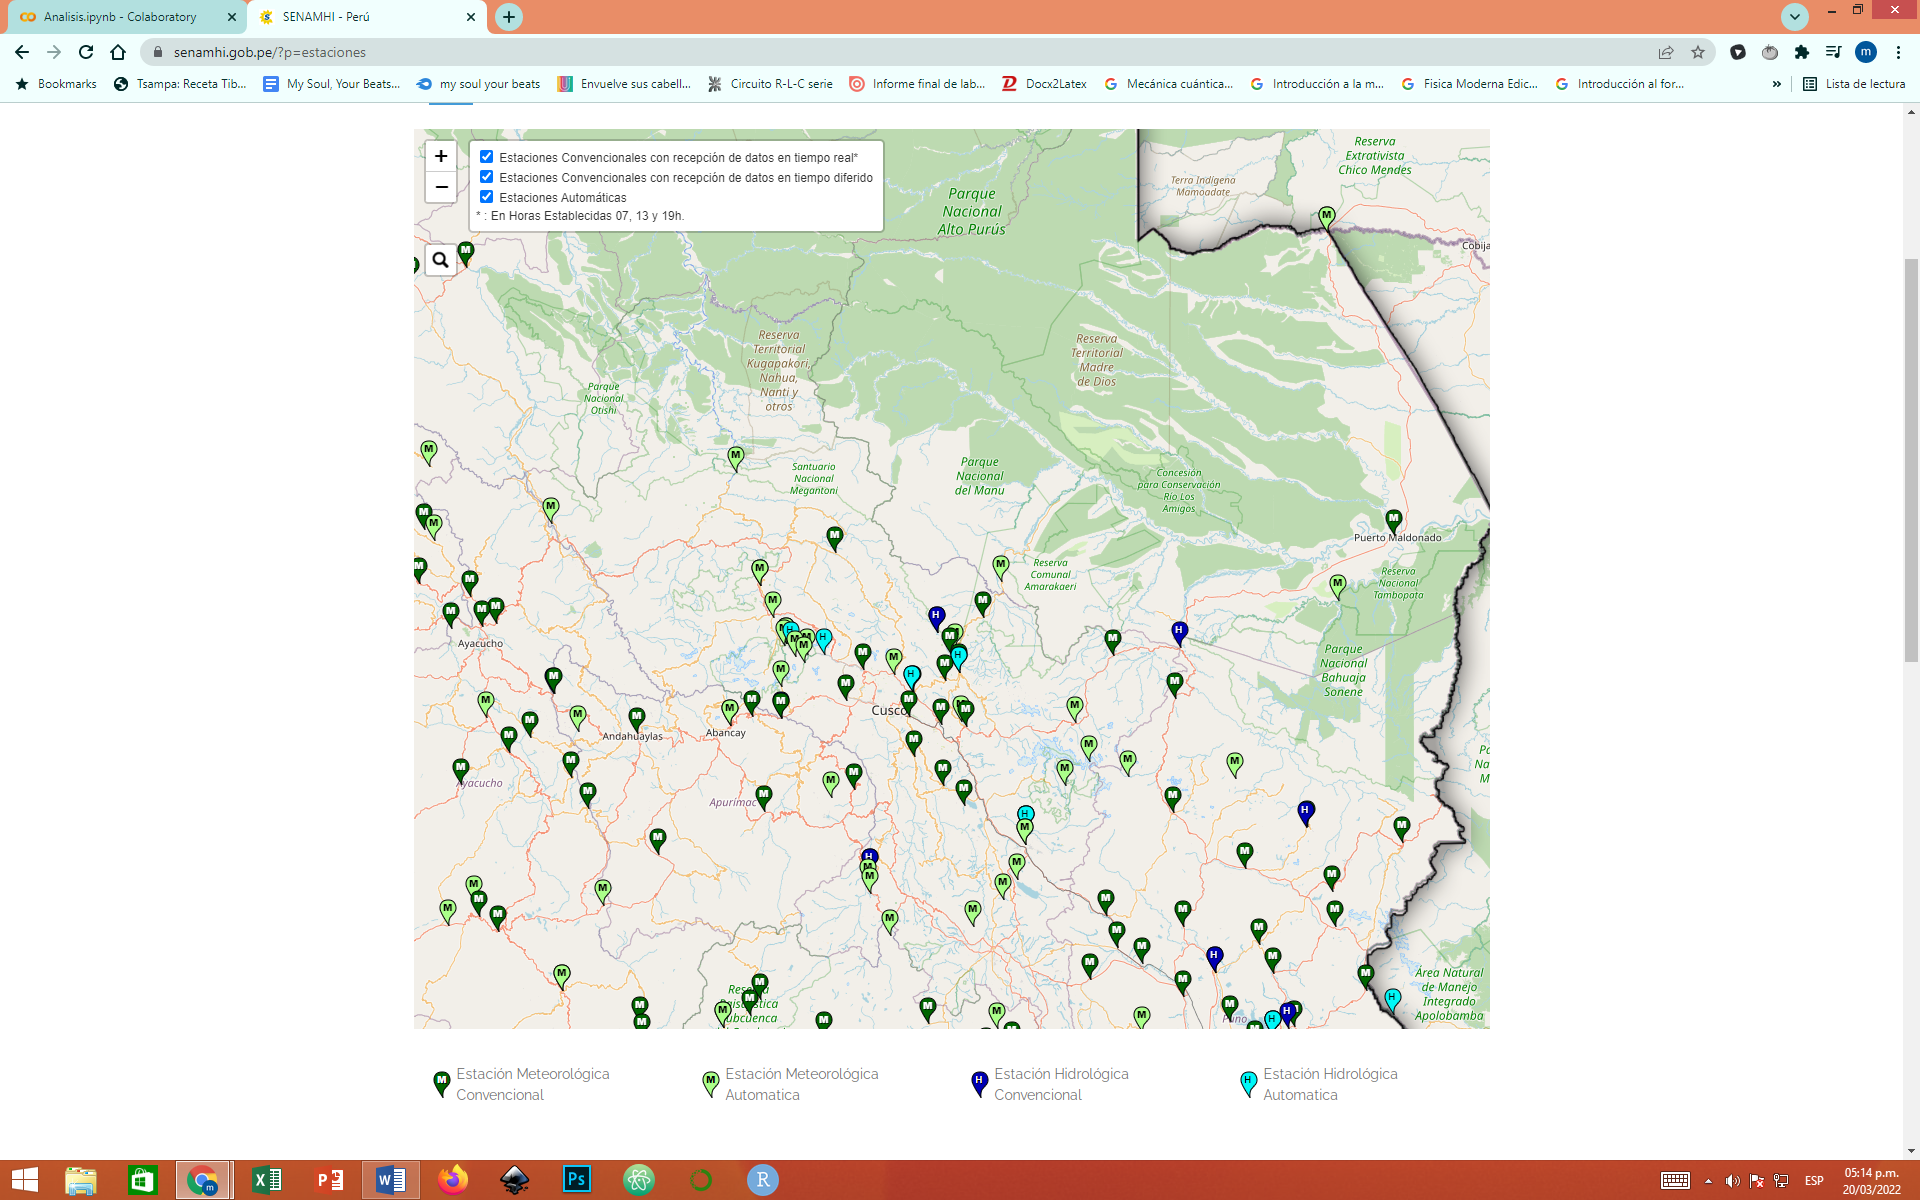

Departamento de Cusco, provincia de Canchis, distrito de Pitumarca, latitud 13°55'19.7'' S, Longitud 71°1'5.63'' W, altitud 4880 msnm. Tipo de estacion Automatica - Meteorológica.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install xlrd
!pip install openpyxl

In [ ]:
excelfile=pd.ExcelFile('Senamhi.xlsx')
print(excelfile.sheet_names)

['raw']


# Colecta y validacion de datos

> Bloc con sangría



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Datos crudos

In [ ]:
df=excelfile.parse('raw')
df

AÑO / MES / DÍA      HORA TEMPERATURA (°C) PRECIPITACIÓN (mm/hora)  \
0          2017-01-01  00:00:00              1.3                       0   
1          2017-01-01  01:00:00              0.7                       0   
2          2017-01-01  02:00:00              0.6                       0   
3          2017-01-01  03:00:00             -0.1                       0   
4          2017-01-01  04:00:00             -0.6                       0   
...               ...       ...              ...                     ...   
40507      2021-12-31  19:00:00              1.9                       0   
40508      2021-12-31  20:00:00              2.8                       0   
40509      2021-12-31  21:00:00                2                       0   
40510      2021-12-31  22:00:00              2.1                       0   
40511      2021-12-31  23:00:00              2.4                       0   

      HUMEDAD (%) DIRECCION DEL VIENTO (°) VELOCIDAD DEL VIENTO (m/s)  
0              90                      199                        1.8  
1              91                      236                        1.8  
2              92                      268                        4.3  
3              98                      263                        3.3  
4              99                      250                        2.8  
...           ...                      ...                        ...  
40507         100                       55                        4.9  
40508          80                       70                        1.7  
40509          85                      284                        1.3  
40510          83                       91                        3.3  
40511          68                       94                        1.5  

[40512 rows x 7 columns]

In [ ]:
list(df.columns.values)

['AÑO / MES / DÍA',
 'HORA',
 'TEMPERATURA (°C)',
 'PRECIPITACIÓN (mm/hora)',
 'HUMEDAD (%)',
 'DIRECCION DEL VIENTO (°)',
 'VELOCIDAD DEL VIENTO (m/s)']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40512 entries, 0 to 40511
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AÑO / MES / DÍA             40512 non-null  datetime64[ns]
 1   HORA                        40512 non-null  object        
 2   TEMPERATURA (°C)            40512 non-null  object        
 3   PRECIPITACIÓN (mm/hora)     40512 non-null  object        
 4   HUMEDAD (%)                 40512 non-null  object        
 5   DIRECCION DEL VIENTO (°)    40512 non-null  object        
 6   VELOCIDAD DEL VIENTO (m/s)  40512 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.2+ MB


In [ ]:
df['TEMPERATURA (°C)'].replace('S/D',np.nan, inplace=True)
df['PRECIPITACIÓN (mm/hora)'].replace('S/D',np.nan, inplace=True)
df['HUMEDAD (%)'].replace('S/D',np.nan, inplace=True)
df['DIRECCION DEL VIENTO (°)'].replace('S/D',np.nan, inplace=True)
df['VELOCIDAD DEL VIENTO (m/s)'].replace('S/D',np.nan, inplace=True)
df['AÑO / MES / DÍA'].replace('S/D',np.nan, inplace=True)
df['HORA'].replace('S/D',np.nan, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40512 entries, 0 to 40511
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AÑO / MES / DÍA             40512 non-null  datetime64[ns]
 1   HORA                        40512 non-null  object        
 2   TEMPERATURA (°C)            40505 non-null  float64       
 3   PRECIPITACIÓN (mm/hora)     40491 non-null  float64       
 4   HUMEDAD (%)                 37821 non-null  float64       
 5   DIRECCION DEL VIENTO (°)    40500 non-null  float64       
 6   VELOCIDAD DEL VIENTO (m/s)  40500 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.2+ MB


In [ ]:
df[['AÑO / MES / DÍA',
 'HORA',
 'TEMPERATURA (°C)',
 'PRECIPITACIÓN (mm/hora)',
 'HUMEDAD (%)',
 'DIRECCION DEL VIENTO (°)',
 'VELOCIDAD DEL VIENTO (m/s)']].isnull().sum()

AÑO / MES / DÍA                  0
HORA                             0
TEMPERATURA (°C)                 7
PRECIPITACIÓN (mm/hora)         21
HUMEDAD (%)                   2691
DIRECCION DEL VIENTO (°)        12
VELOCIDAD DEL VIENTO (m/s)      12
dtype: int64

In [ ]:
df.isnull().sum().sum()

2743

In [ ]:
df['AÑO / MES / DÍA']=df['AÑO / MES / DÍA'].apply(str)

In [ ]:
df['HORA']=df['HORA'].apply(str)

In [ ]:
df['Fecha']=df['AÑO / MES / DÍA'] + ' ' + df['HORA']

In [ ]:
df['Fecha']=pd.to_datetime(df['Fecha'])

In [ ]:
from pytz import timezone
from pytz import all_timezones 
import datetime

In [ ]:
df=df.drop(columns=['AÑO / MES / DÍA','HORA'])
df.head()

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  HUMEDAD (%)  \
0               1.3                      0.0         90.0   
1               0.7                      0.0         91.0   
2               0.6                      0.0         92.0   
3              -0.1                      0.0         98.0   
4              -0.6                      0.0         99.0   

   DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)               Fecha  
0                     199.0                         1.8 2017-01-01 00:00:00  
1                     236.0                         1.8 2017-01-01 01:00:00  
2                     268.0                         4.3 2017-01-01 02:00:00  
3                     263.0                         3.3 2017-01-01 03:00:00  
4                     250.0                         2.8 2017-01-01 04:00:00

Ates de elegir que metodo usaremos para rellenar o remplazar los datos NaN, haremos uan grafica paar vizualizar la continuidad de los dtos.

In [ ]:
#df.to_excel('SenamhiLimpio.xlsx')
#from google.colab import files
#files.download('SenamhiLimpio.xlsx')

In [ ]:
import altair as alt
import matplotlib.pyplot as plt

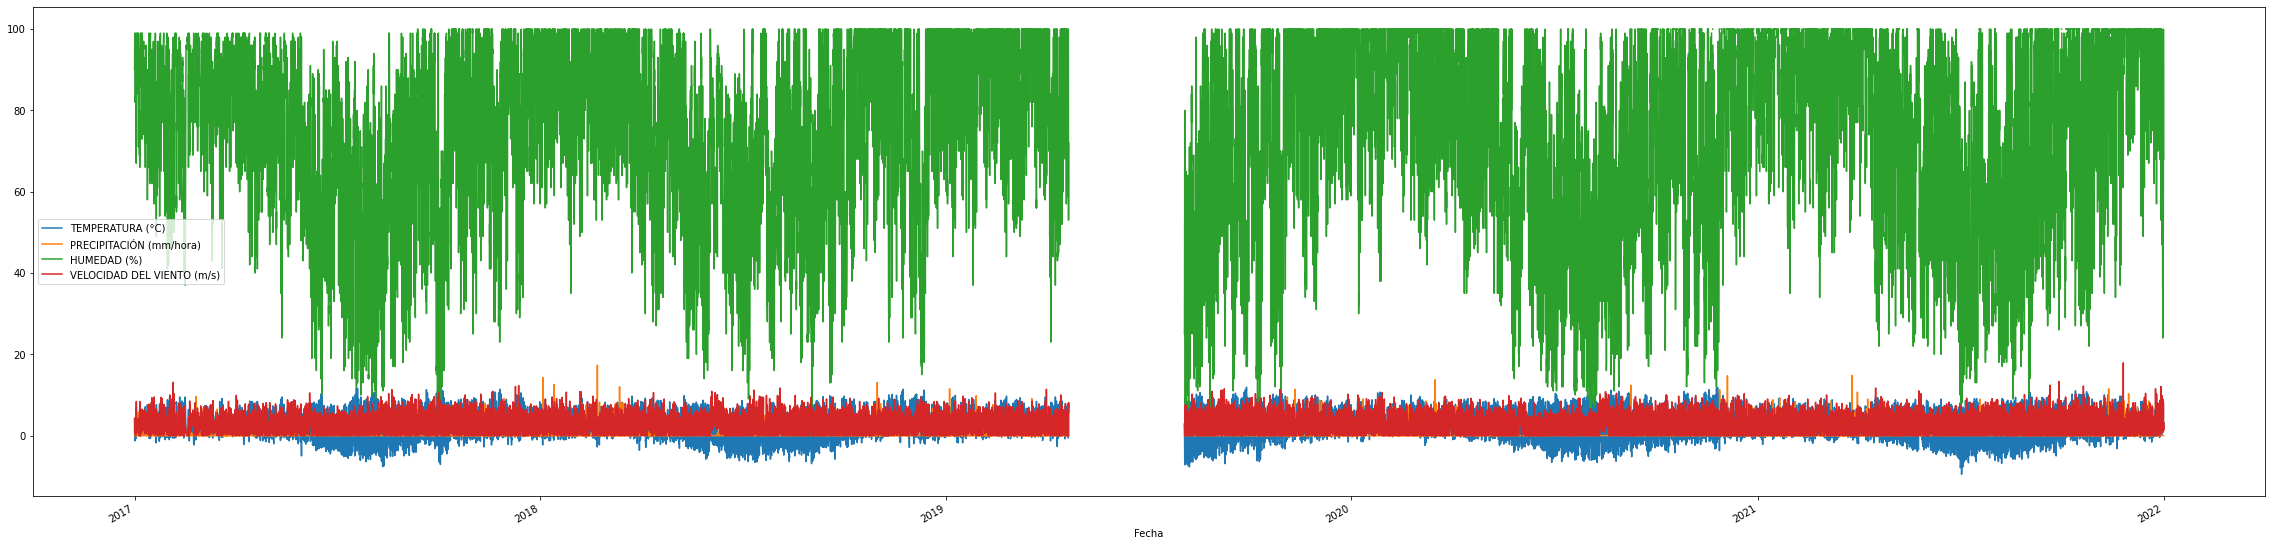

In [ ]:
df.plot(x='Fecha',y=['TEMPERATURA (°C)','PRECIPITACIÓN (mm/hora)','HUMEDAD (%)','VELOCIDAD DEL VIENTO (m/s)'],figsize=(40,10) )

El grafico nos idenica que para todas las variables faltan datos, revisando la base de datos faltan datos desde Mayo a Agosto.

In [ ]:
df2=df.copy(deep=True)

In [ ]:
df2['HR']=df2['Fecha'].dt.hour
df2['MN']=df2['Fecha'].dt.month
df2['YR']=df2['Fecha'].dt.year

In [ ]:
df2['HR'].apply(str)
df2['MN'].apply(str)
df2['YR'].apply(str)

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
40507    2021
40508    2021
40509    2021
40510    2021
40511    2021
Name: YR, Length: 40512, dtype: object

In [ ]:
df=df.set_index('Fecha')

In [ ]:
#df=df.tz_localize('UTC')
#df.head()

In [ ]:
#df=df.tz_convert('America/Lima')
#df.head()

Tener e cuenta que faltan datos de un peridodo largo del 2019

# Medidas de tendencia central

In [ ]:
df.loc['2017'].describe()

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  HUMEDAD (%)  \
count       8178.000000               8174.00000  8177.000000   
mean           2.120580                  0.08346    73.103216   
std            3.213137                  0.45811    21.632824   
min           -7.600000                  0.00000     7.000000   
25%            0.000000                  0.00000    60.000000   
50%            1.600000                  0.00000    78.000000   
75%            4.400000                  0.00000    90.000000   
max           11.800000                  9.60000   100.000000   

       DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
count               8177.000000                 8177.000000  
mean                 190.767519                    2.566271  
std                  100.177810                    1.965993  
min                    1.000000                    0.000000  
25%                  107.000000                    1.000000  
50%                  205.000000                    2.200000  
75%                  269.000000                    3.700000  
max                  360.000000                   13.100000

In [ ]:
df.loc['2018'].describe()

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  HUMEDAD (%)  \
count       8677.000000              8676.000000  8676.000000   
mean           1.790342                 0.098963    75.039419   
std            3.180043                 0.619823    21.929498   
min           -6.900000                 0.000000     7.000000   
25%           -0.300000                 0.000000    60.000000   
50%            1.400000                 0.000000    78.000000   
75%            4.100000                 0.000000    96.000000   
max           11.400000                17.300000   100.000000   

       DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
count               8676.000000                 8676.000000  
mean                 188.446634                    2.617808  
std                  101.541812                    2.051130  
min                    1.000000                    0.000000  
25%                  100.000000                    1.000000  
50%                  202.000000                    2.200000  
75%                  268.000000                    3.900000  
max                  360.000000                   11.700000

In [ ]:
df.loc['2019'].describe()

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  HUMEDAD (%)  \
count       6239.000000              6238.000000  6235.000000   
mean           2.482273                 0.112055    78.870890   
std            3.206409                 0.575017    23.878848   
min           -7.700000                 0.000000     7.000000   
25%            0.400000                 0.000000    64.000000   
50%            2.000000                 0.000000    87.000000   
75%            4.700000                 0.000000   100.000000   
max           11.900000                11.500000   100.000000   

       DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
count               6238.000000                 6238.000000  
mean                 173.876723                    2.608737  
std                  101.313631                    2.049621  
min                    1.000000                    0.000000  
25%                   86.000000                    1.000000  
50%                  175.000000                    2.200000  
75%                  256.000000                    3.800000  
max                  360.000000                   11.500000

In [ ]:
df.loc['2020'].describe()

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  HUMEDAD (%)  \
count       8740.000000              8738.000000  7948.000000   
mean           2.419657                 0.093122    71.634499   
std            3.353015                 0.554914    25.207565   
min           -6.600000                 0.000000     5.000000   
25%            0.100000                 0.000000    54.000000   
50%            2.000000                 0.000000    76.000000   
75%            4.900000                 0.000000    97.000000   
max           11.800000                14.700000   100.000000   

       DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
count               8739.000000                 8739.000000  
mean                 186.298547                    2.547832  
std                  103.141460                    2.123985  
min                    1.000000                    0.000000  
25%                   93.000000                    0.800000  
50%                  199.000000                    2.100000  
75%                  269.000000                    3.900000  
max                  360.000000                   10.800000

In [ ]:
df.loc['2021'].describe()

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  HUMEDAD (%)  \
count       8671.000000              8665.000000  6785.000000   
mean           1.922766                 0.118731    71.587915   
std            3.260325                 0.660665    23.511388   
min           -9.500000                 0.000000     6.000000   
25%           -0.200000                 0.000000    54.000000   
50%            1.400000                 0.000000    75.000000   
75%            4.300000                 0.000000    93.000000   
max           11.000000                14.800000   100.000000   

       DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
count               8670.000000                 8670.000000  
mean                 189.170358                    2.575306  
std                  102.269146                    2.155054  
min                    1.000000                    0.000000  
25%                  100.000000                    0.800000  
50%                  206.000000                    2.200000  
75%                  271.000000                    3.900000  
max                  360.000000                   17.900000

In [ ]:
df.describe()

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)   HUMEDAD (%)  \
count      40505.000000             40491.000000  37821.000000   
mean           2.127735                 0.100820     73.917718   
std            3.256678                 0.579318     23.338503   
min           -9.500000                 0.000000      5.000000   
25%            0.000000                 0.000000     58.000000   
50%            1.700000                 0.000000     78.000000   
75%            4.500000                 0.000000     95.000000   
max           11.900000                17.300000    100.000000   

       DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
count              40500.000000                40500.000000  
mean                 186.362519                    2.581807  
std                  101.882138                    2.072828  
min                    1.000000                    0.000000  
25%                   97.000000                    1.000000  
50%                  199.000000                    2.200000  
75%                  268.000000                    3.900000  
max                  360.000000                   17.900000

In [ ]:
df2.groupby('YR').median()

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  HUMEDAD (%)  \
YR                                                             
2017               1.6                      0.0         78.0   
2018               1.4                      0.0         78.0   
2019               2.0                      0.0         87.0   
2020               2.0                      0.0         76.0   
2021               1.4                      0.0         75.0   

      DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)    HR   MN  
YR                                                                     
2017                     205.0                         2.2  11.0  7.0  
2018                     202.0                         2.2  12.0  7.0  
2019                     175.0                         2.2  12.0  8.0  
2020                     199.0                         2.1  12.0  7.0  
2021                     206.0                         2.2  12.0  7.0

In [ ]:
df_gp=df2.groupby(['YR','MN'])[['TEMPERATURA (°C)']].median().sort_values(by='MN', ascending=True)

In [ ]:
df_gp.pivot_table(values='TEMPERATURA (°C)', index='YR',columns='MN')

MN     1    2     3    4     5     6    7     8     9     10   11   12
YR                                                                    
2017  1.9  1.9  2.20  2.1  1.40  0.60  0.1  0.25  1.00  1.00  2.1  1.9
2018  1.6  2.1  2.10  1.7  0.90 -0.60 -0.8 -0.90  0.50  1.40  2.5  1.9
2019  2.2  2.5  2.25  2.7   NaN   NaN  NaN -0.10  1.40  1.60  1.7  2.1
2020  2.8  2.6  2.70  2.3  1.55  0.80  0.2  0.80  1.10  1.25  2.7  1.8
2021  1.9  1.7  1.40  1.6  0.90  0.15 -0.5 -0.10  0.85  1.80  1.9  2.2

In [ ]:
df2.pivot_table(values='TEMPERATURA (°C)', index='YR',columns='MN')

MN          1         2         3         4         5         6         7   \
YR                                                                           
2017  2.330743  2.660411  2.689120  2.523217  2.091655  1.646528  1.099731   
2018  2.137820  2.658269  2.698922  2.458472  1.707547  0.163472 -0.081583   
2019  2.882065  2.909925  2.921640  3.173843       NaN       NaN       NaN   
2020  3.307902  3.171053  3.130352  2.918056  2.212769  1.671111  1.222581   
2021  2.547961  2.410287  2.017434  2.321111  1.720833  0.988194  0.635753   

MN          8         9         10        11        12  
YR                                                      
2017  1.214382  1.993750  2.006081  2.894965  2.717339  
2018  0.159244  1.385609  2.186425  3.265694  2.808199  
2019  0.887574  2.035972  2.331090  2.591643  2.730811  
2020  1.736828  1.947083  1.990188  3.409986  2.416825  
2021  0.950134  1.832639  2.659354  2.450210  2.637193

In [ ]:
df2.pivot_table(values='PRECIPITACIÓN (mm/hora)', index='YR',columns='MN')

MN          1         2         3         4         5         6         7   \
YR                                                                           
2017  0.161140  0.172751  0.196955  0.093706  0.037685  0.003611  0.007258   
2018  0.188291  0.276043  0.220620  0.048194  0.008097  0.021111  0.027831   
2019  0.176630  0.175639  0.174059  0.064386       NaN       NaN       NaN   
2020  0.180109  0.301316  0.148440  0.055694  0.058871  0.003750  0.001075   
2021  0.273239  0.196672  0.229412  0.107778  0.012366  0.000417  0.016667   

MN          8         9         10        11        12  
YR                                                      
2017  0.021909  0.037222  0.083875  0.115266  0.145833  
2018  0.032119  0.028341  0.147581  0.107222  0.094086  
2019  0.008136  0.009306  0.038896  0.155509  0.186622  
2020  0.000000  0.046667  0.078226  0.076761  0.179512  
2021  0.003226  0.022917  0.100000  0.223703  0.257493

In [ ]:
df2.pivot_table(values='HUMEDAD (%)', index='YR',columns='MN')

MN           1          2          3          4          5          6   \
YR                                                                       
2017  83.468048  81.491003  84.967949  82.434965  79.145357  60.666667   
2018  86.682369  87.391036  86.777628  74.987500  62.812416  63.463889   
2019  87.815217  91.090226  89.795699  81.410463        NaN        NaN   
2020  87.672857  93.224417  86.699690  82.044413  67.566145  63.237500   
2021  86.284946  85.257426  86.166253  76.527972  64.838109  66.240612   

MN           7          8          9          10         11         12  
YR                                                                      
2017  54.780914  56.858871  69.980556  71.739189  77.443357  82.508065  
2018  59.646658  70.781377  67.252570  83.674731  81.993056  75.563172  
2019        NaN  51.245562  65.093056  66.001346  85.495822  91.508152  
2020  52.010753  48.146505  71.457462  72.316800  62.805112  84.365385  
2021  49.986226  59.950000  71.038880  75.377295  82.965164  85.106888

In [ ]:
df2.pivot_table(values='DIRECCION DEL VIENTO (°)', index='YR',columns='MN')

MN            1           2           3           4           5           6   \
YR                                                                             
2017  155.423143  167.159383  164.320513  194.453147  214.659489  223.033333   
2018  176.364738  164.428130  186.687332  157.816667  194.508772  233.430556   
2019  163.959239  163.821053  157.010753  182.217304         NaN         NaN   
2020  169.651226  172.577485  148.959294  185.177778  208.522849  216.755556   
2021  184.946554  154.995461  172.463687  185.369444  203.991935  220.493056   

MN            7           8           9           10          11          12  
YR                                                                            
2017  209.139785  213.142473  203.500000  181.879730  165.806993  173.930108  
2018  205.349250  229.875843  181.060206  178.575269  180.975000  169.173387  
2019         NaN  189.578402  179.375000  175.921938  171.394700  184.790541  
2020  224.315860  228.206989  185.075000  159.302419  166.772152  168.457259  
2021  212.500000  215.909946  165.740278  184.060565  179.660589  184.956403

In [ ]:
df2.pivot_table(values='VELOCIDAD DEL VIENTO (m/s)', index='YR',columns='MN')

MN          1         2         3         4         5         6         7   \
YR                                                                           
2017  2.837133  2.406684  2.429968  2.397063  2.487483  2.538194  2.197312   
2018  2.598385  2.554096  2.630189  2.485972  2.153846  3.294583  3.046794   
2019  2.515217  2.474737  2.355511  2.363581       NaN       NaN       NaN   
2020  2.707902  2.163012  2.549118  2.255694  2.341801  2.355417  2.268011   
2021  2.393249  2.606051  2.240503  2.344306  2.794086  2.517083  2.858333   

MN          8         9         10        11        12  
YR                                                      
2017  2.751882  2.909028  2.750405  2.584196  2.472984  
2018  2.755196  2.469310  2.436022  2.330833  2.650941  
2019  2.632840  3.217917  2.988425  2.518689  2.332703  
2020  3.575269  2.654722  2.758199  2.649648  2.255902  
2021  2.816532  2.702083  2.669717  2.255119  2.672207

In [ ]:
import seaborn as sns

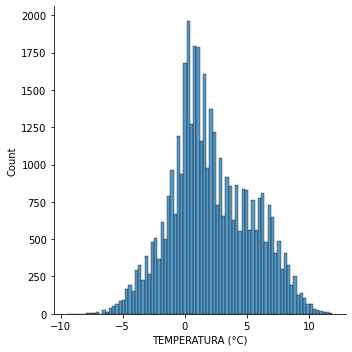

In [ ]:
sns.displot(df, x='TEMPERATURA (°C)')

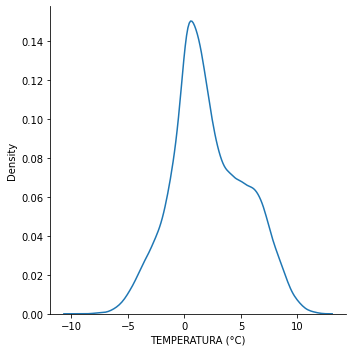

In [ ]:
sns.displot(df, x='TEMPERATURA (°C)',kind='kde')

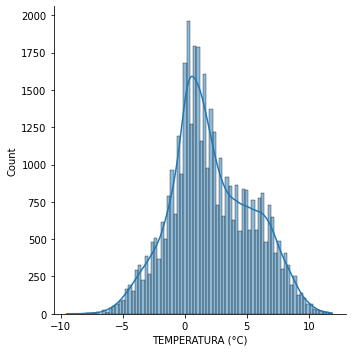

In [ ]:
sns.displot(df, x='TEMPERATURA (°C)',kde=True)

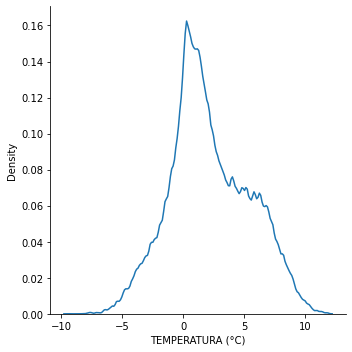

In [ ]:
sns.displot(df, x='TEMPERATURA (°C)',kind='kde',bw_adjust=.25)

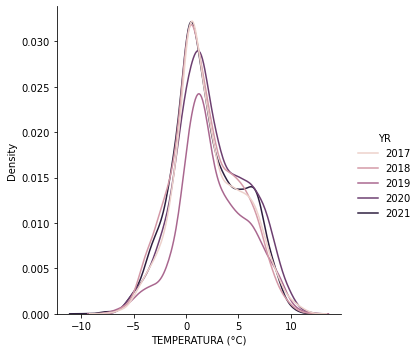

In [ ]:
sns.displot(df2, x='TEMPERATURA (°C)', hue='YR',kind='kde')

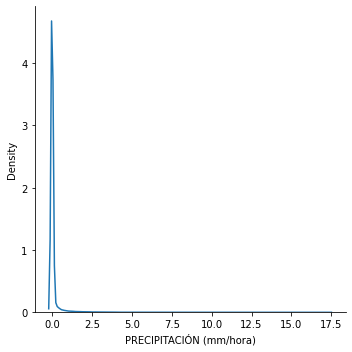

In [ ]:
sns.displot(df, x='PRECIPITACIÓN (mm/hora)',kind='kde')

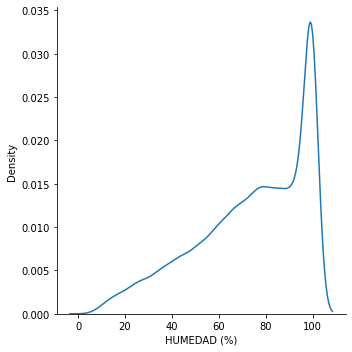

In [ ]:
sns.displot(df, x='HUMEDAD (%)',kind='kde')

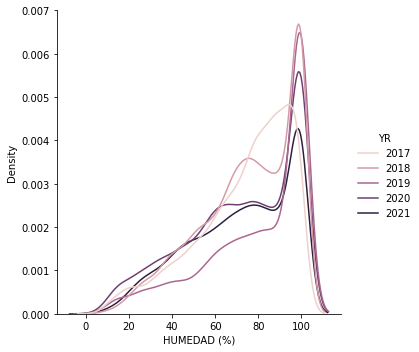

In [ ]:
sns.displot(df2, x='HUMEDAD (%)', hue='YR',kind='kde')

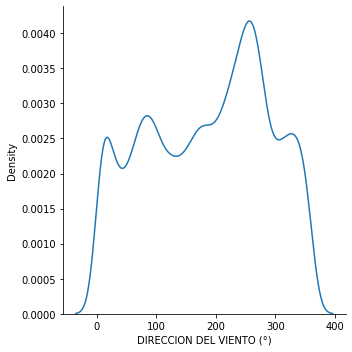

In [ ]:
sns.displot(df, x='DIRECCION DEL VIENTO (°)',kind='kde')

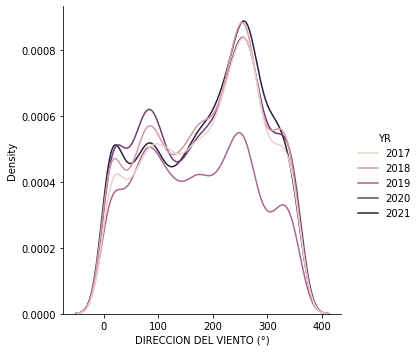

In [ ]:
sns.displot(df2, x='DIRECCION DEL VIENTO (°)', hue='YR',kind='kde')

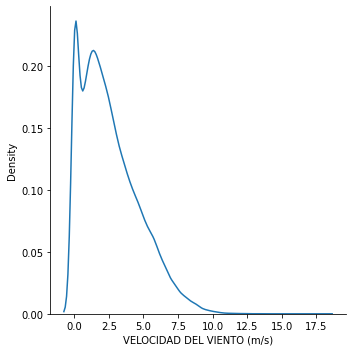

In [ ]:
sns.displot(df, x='VELOCIDAD DEL VIENTO (m/s)',kind='kde')

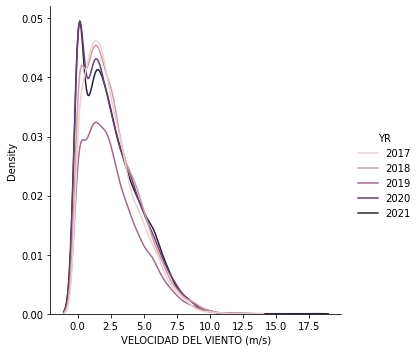

In [ ]:
sns.displot(df2, x='VELOCIDAD DEL VIENTO (m/s)', hue='YR',kind='kde')

In [ ]:
df=df.reset_index()

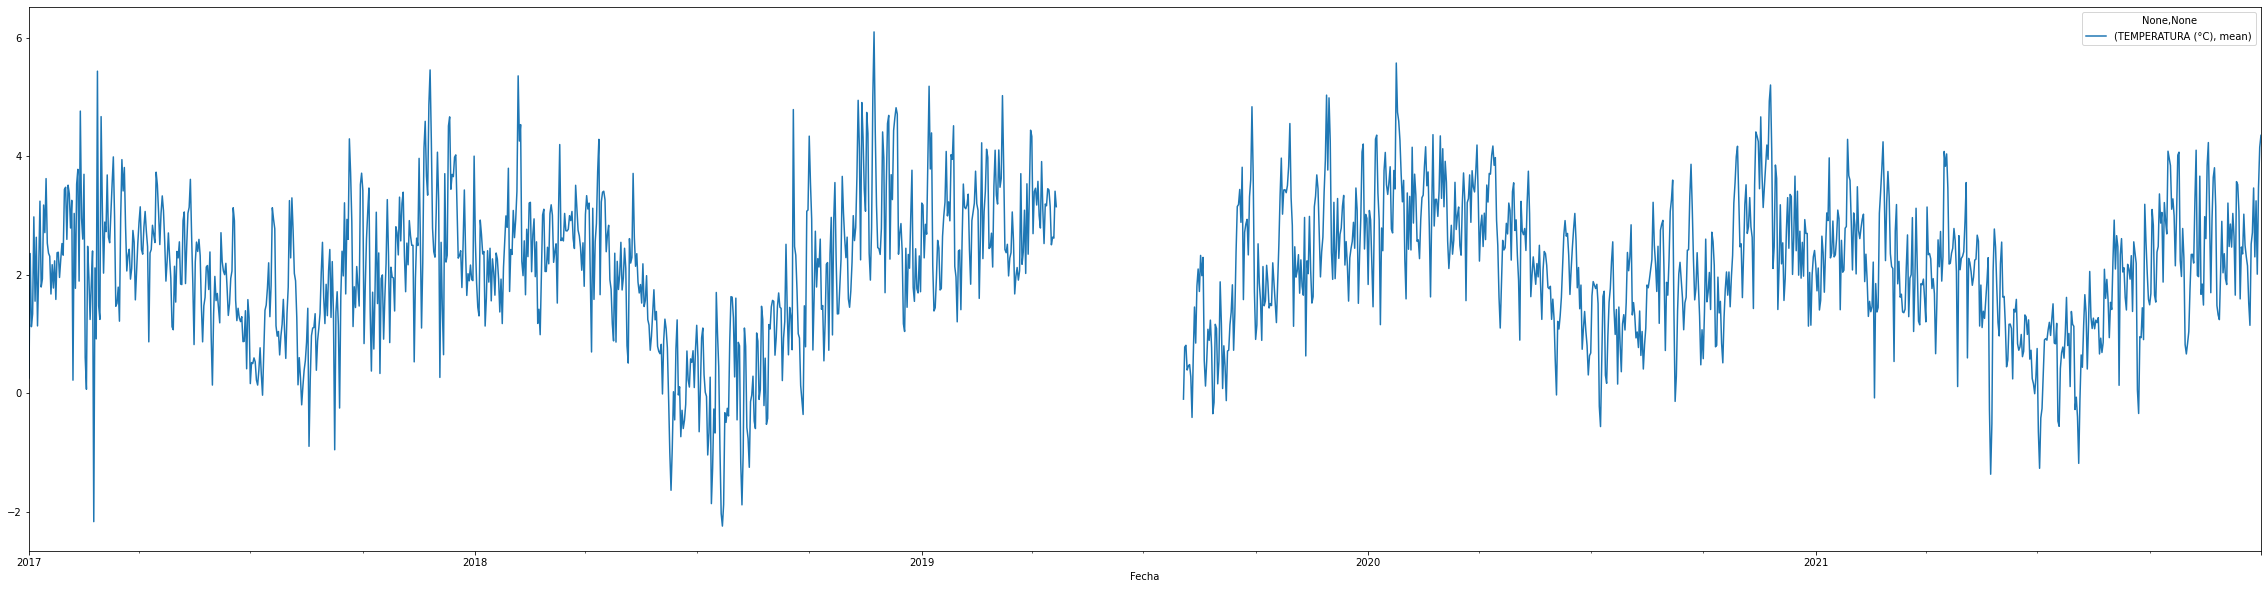

In [ ]:
df.groupby(pd.Grouper(key='Fecha',freq='D')).agg({'TEMPERATURA (°C)':[np.mean]}).plot(figsize=(40,10))

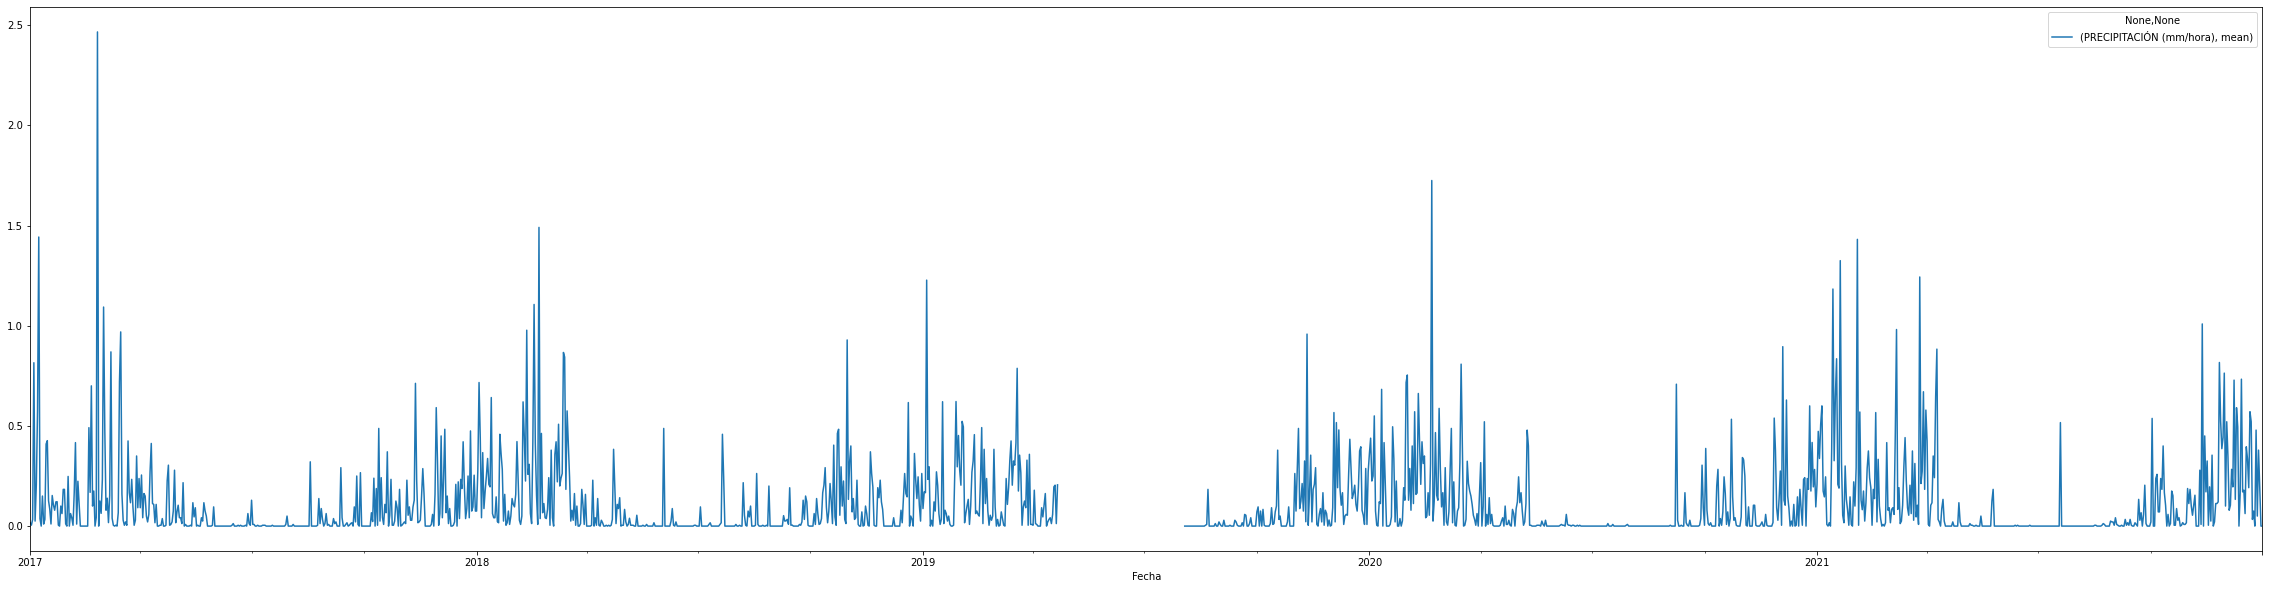

In [ ]:
df.groupby(pd.Grouper(key='Fecha',freq='D')).agg({'PRECIPITACIÓN (mm/hora)':[np.mean]}).plot(figsize=(40,10))

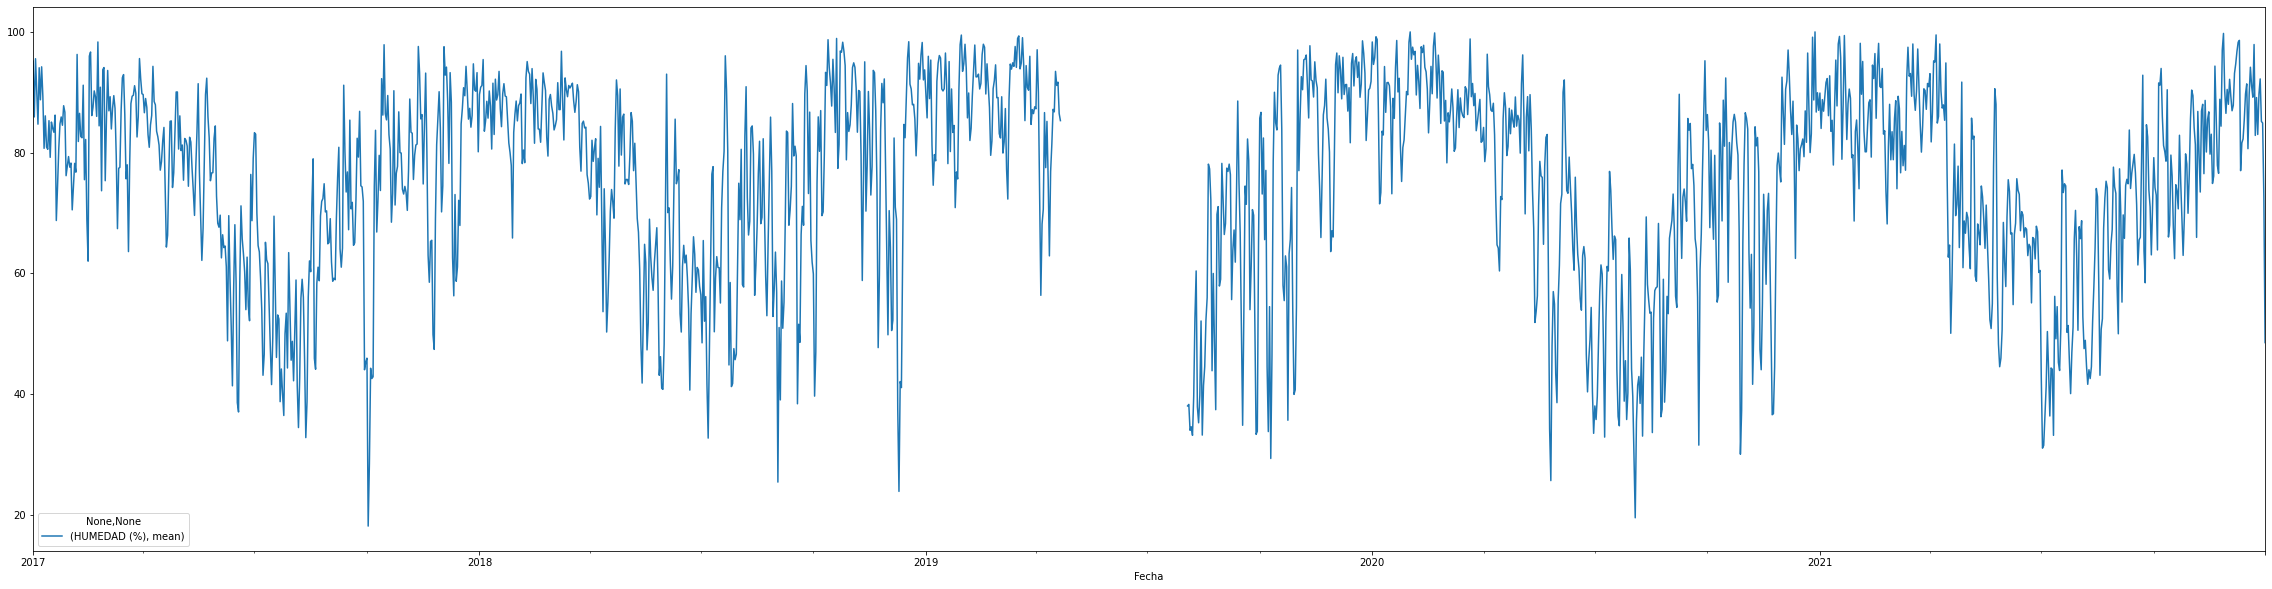

In [ ]:
df.groupby(pd.Grouper(key='Fecha',freq='D')).agg({'HUMEDAD (%)':[np.mean]}).plot(figsize=(40,10))

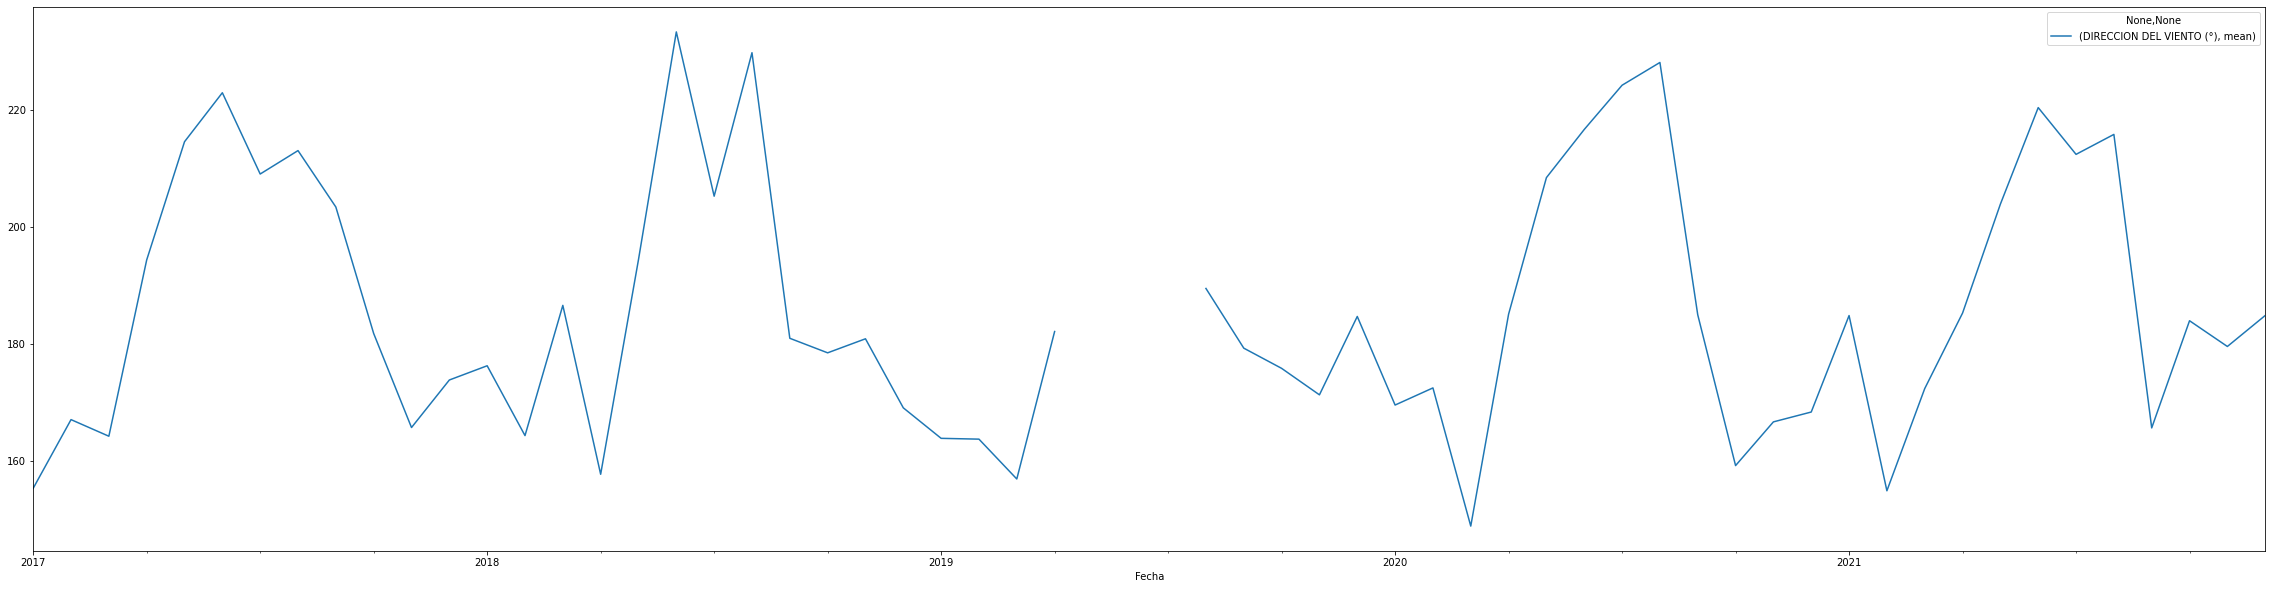

In [ ]:
df.groupby(pd.Grouper(key='Fecha',freq='M')).agg({'DIRECCION DEL VIENTO (°)':[np.mean]}).plot(figsize=(40,10))

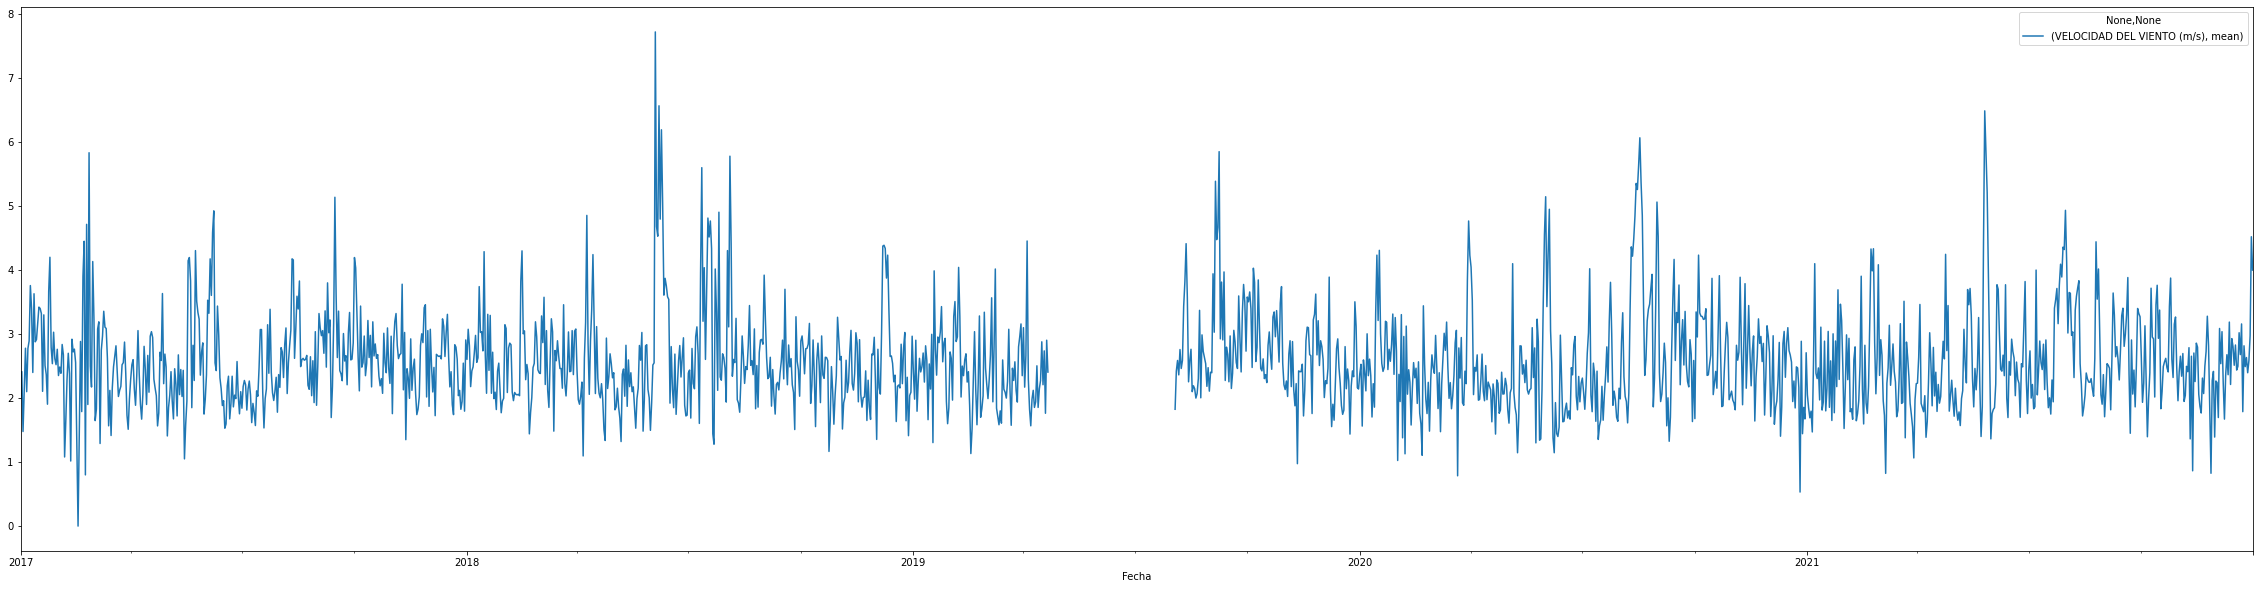

In [ ]:
df.groupby(pd.Grouper(key='Fecha',freq='D')).agg({'VELOCIDAD DEL VIENTO (m/s)':[np.mean]}).plot(figsize=(40,10))

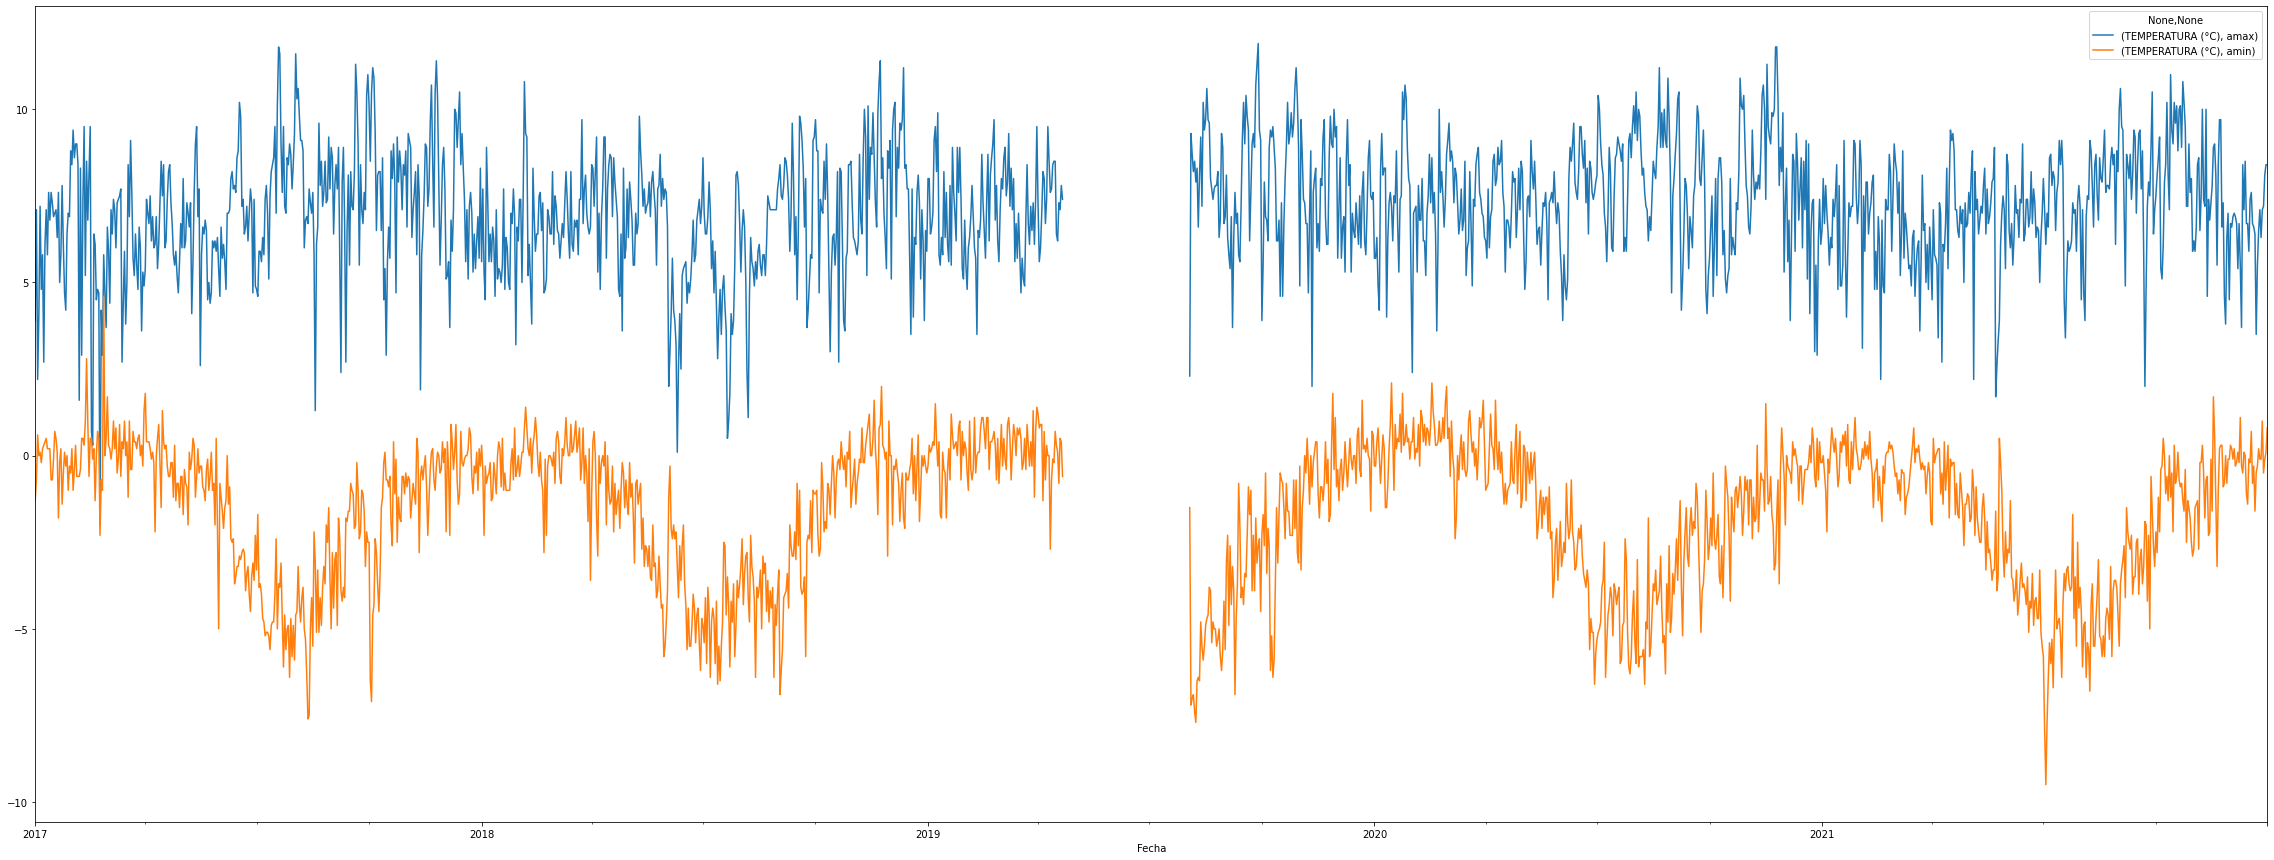

In [ ]:
df.groupby(pd.Grouper(key='Fecha',freq='D')).agg({'TEMPERATURA (°C)':[np.max,np.min]}).plot(figsize=(40,15))

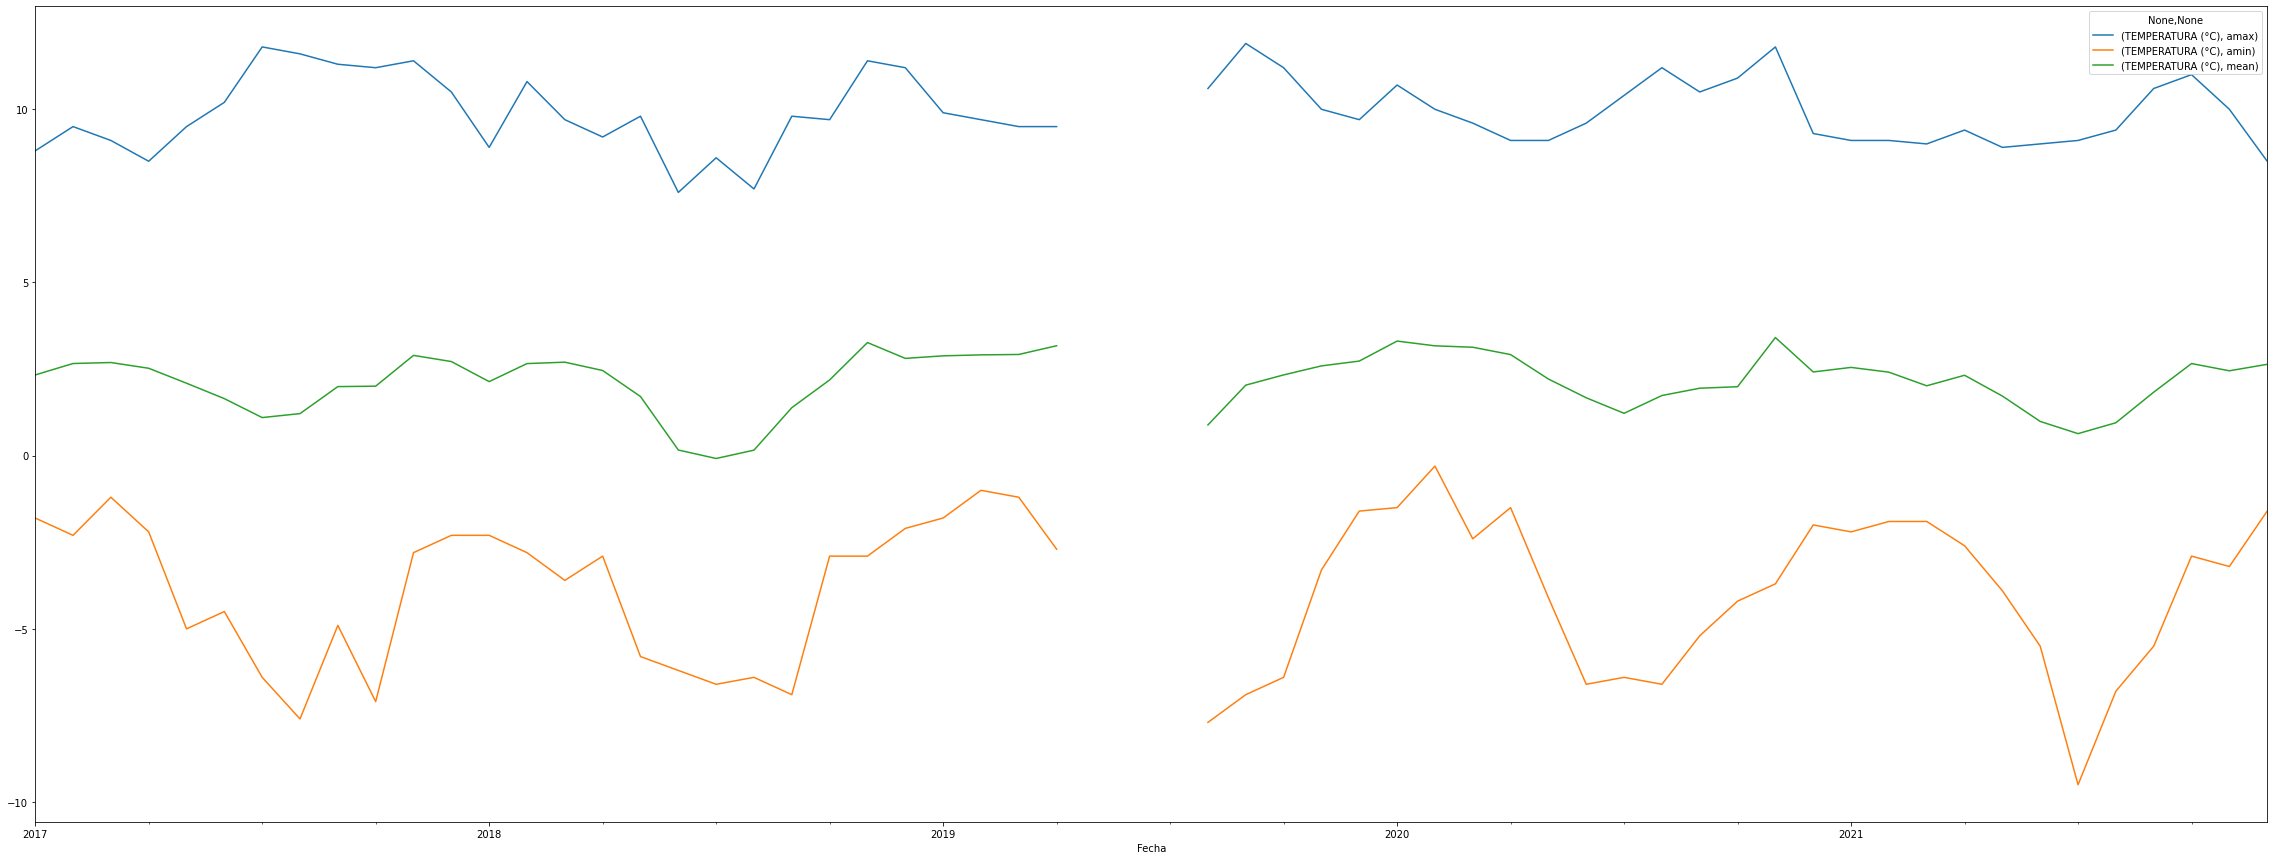

In [ ]:
df.groupby(pd.Grouper(key='Fecha',freq='M')).agg({'TEMPERATURA (°C)':[np.max,np.min,np.mean]}).plot(figsize=(40,15))

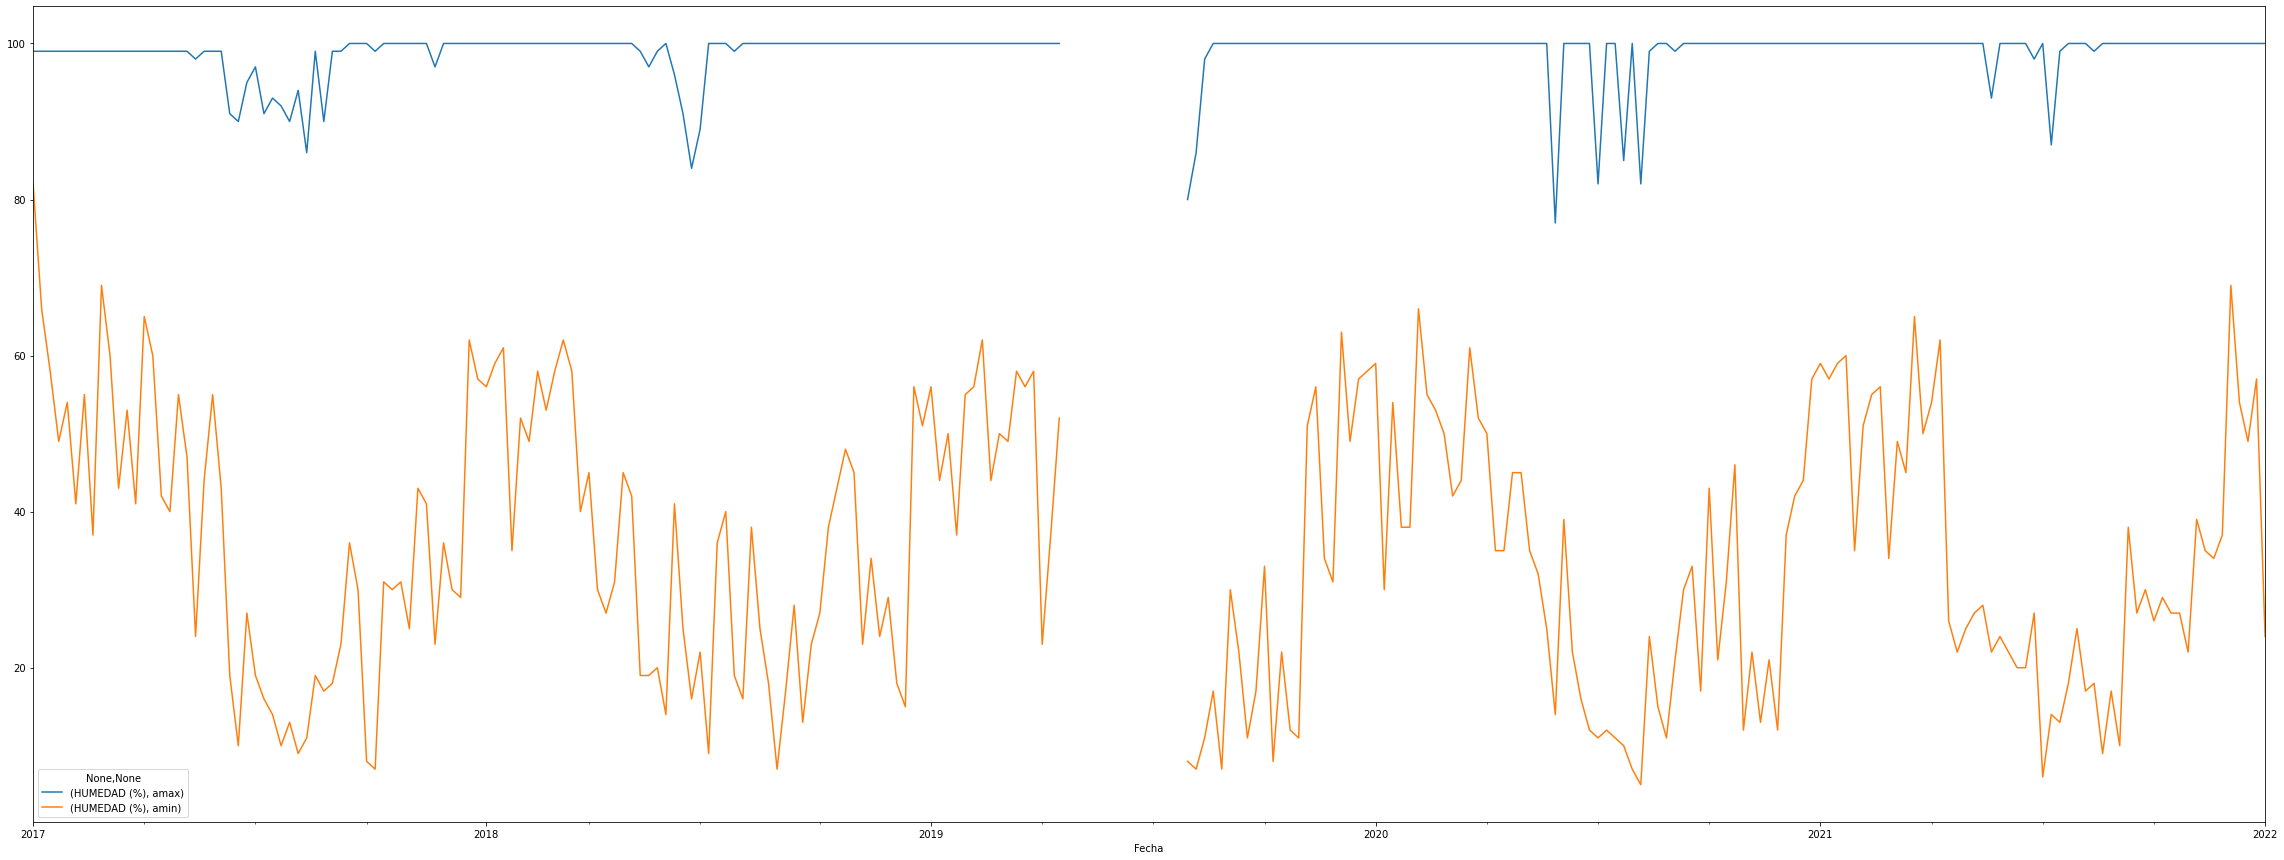

In [ ]:
df.groupby(pd.Grouper(key='Fecha',freq='W')).agg({'HUMEDAD (%)':[np.max,np.min]}).plot(figsize=(40,15))

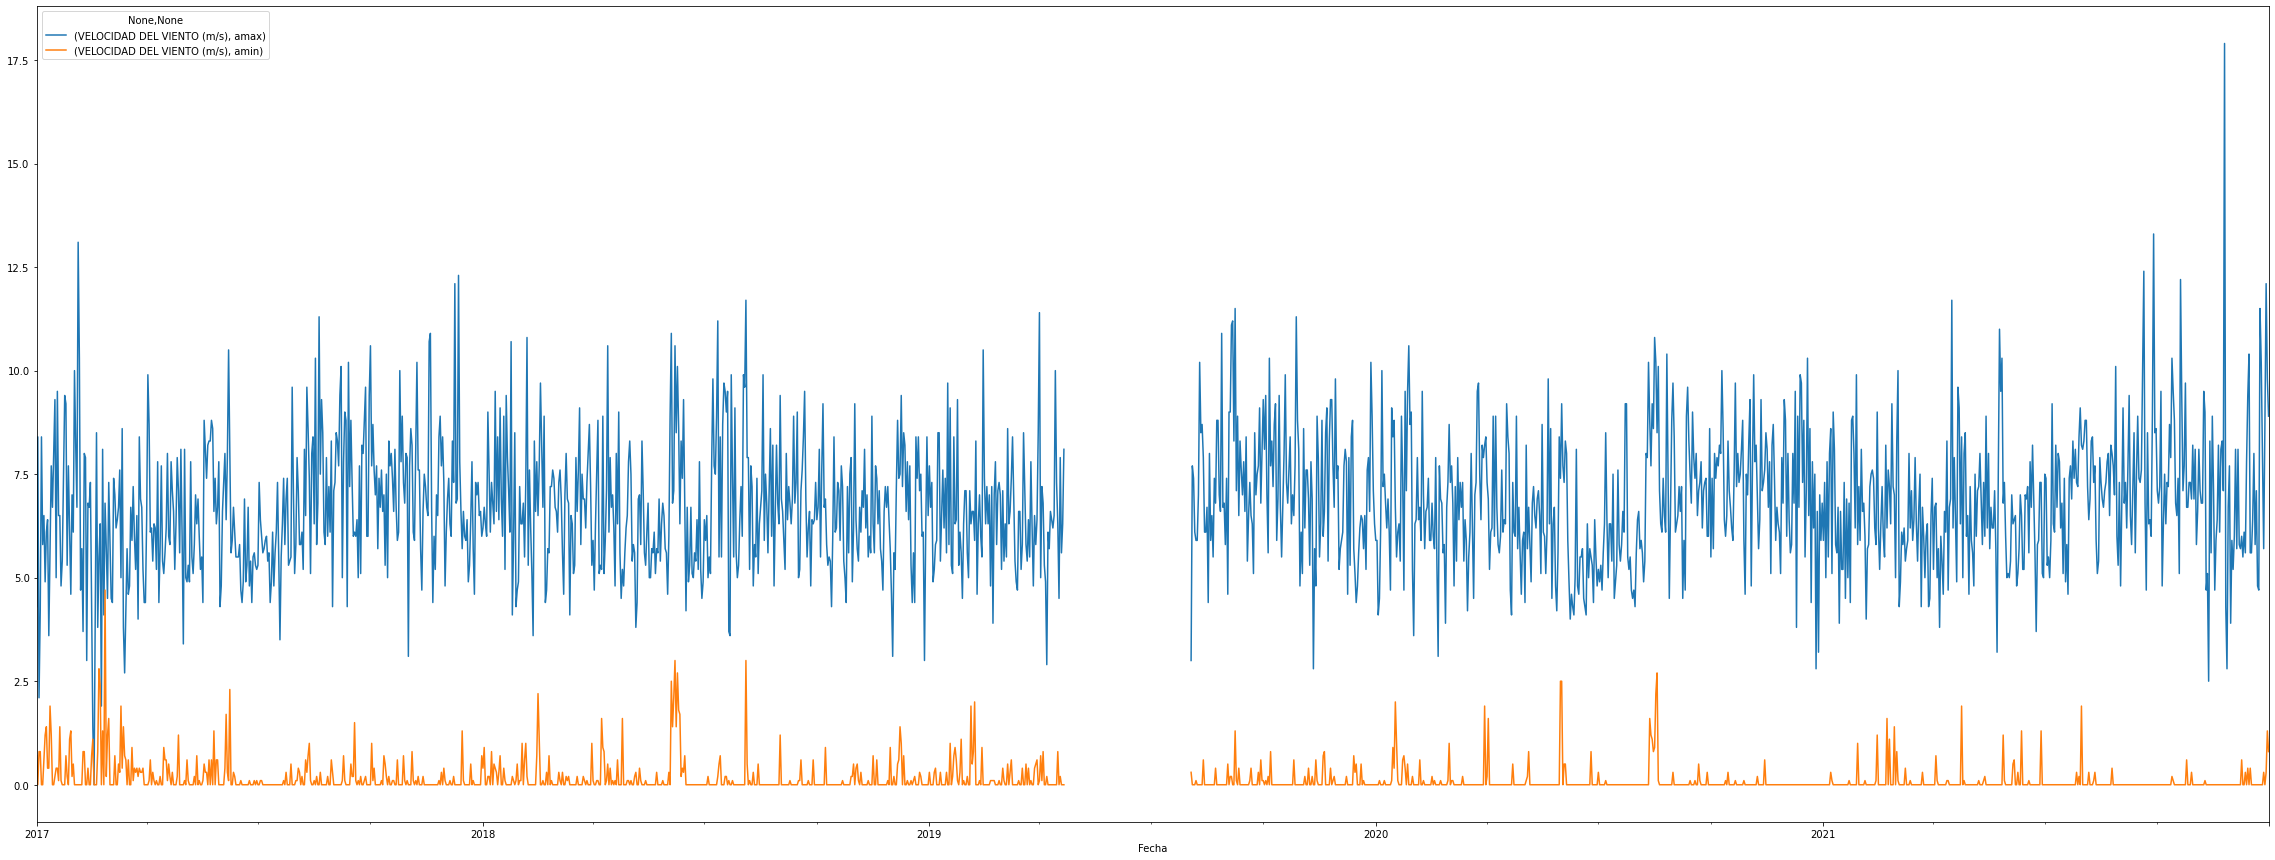

In [ ]:
df.groupby(pd.Grouper(key='Fecha',freq='D')).agg({'VELOCIDAD DEL VIENTO (m/s)':[np.max,np.min]}).plot(figsize=(40,15))

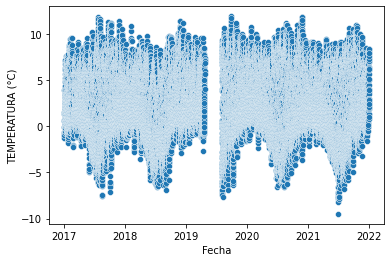

In [ ]:
sns.scatterplot(data=df2,x='Fecha',y='TEMPERATURA (°C)')

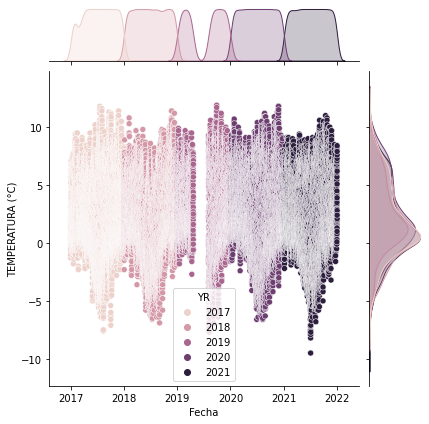

In [ ]:
sns.jointplot(data=df2,x='Fecha',y='TEMPERATURA (°C)',hue='YR')

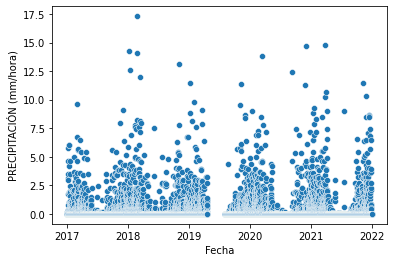

In [ ]:
sns.scatterplot(data=df,x='Fecha',y='PRECIPITACIÓN (mm/hora)')

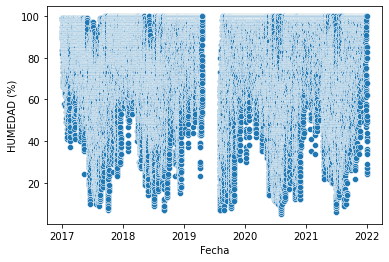

In [ ]:
sns.scatterplot(data=df,x='Fecha',y='HUMEDAD (%)')

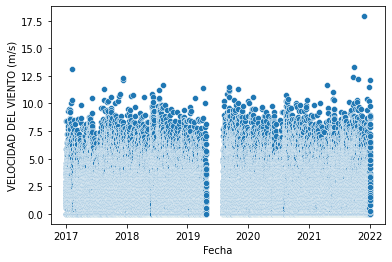

In [ ]:
sns.scatterplot(data=df,x='Fecha',y= 'VELOCIDAD DEL VIENTO (m/s)')

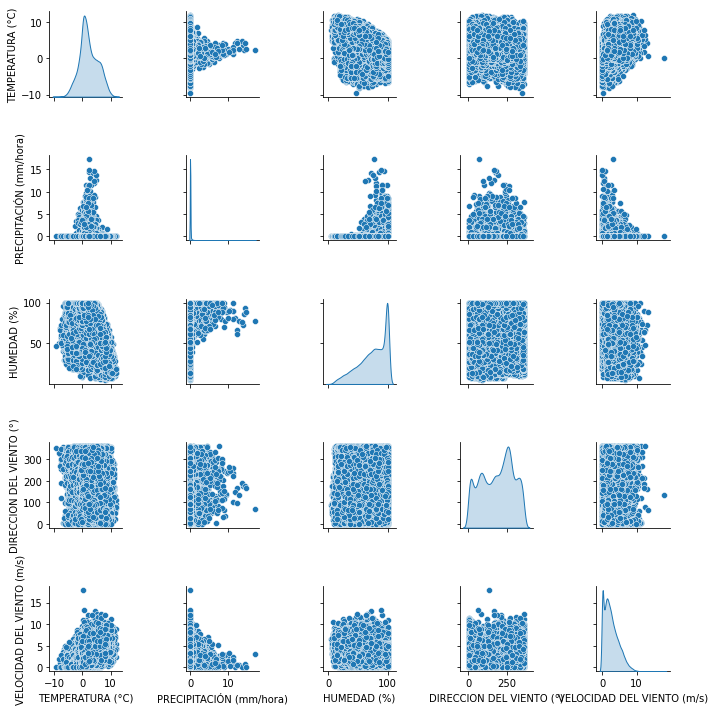

In [ ]:
sns.pairplot(df, palette='inferno', diag_kind='kde', height=2.0)

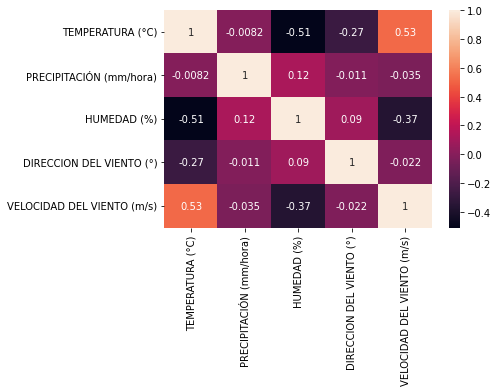

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
#sns.pairplot(df2, hue='YR', palette='inferno', diag_kind='kde', height=2.0)

# Medidas de dispersion

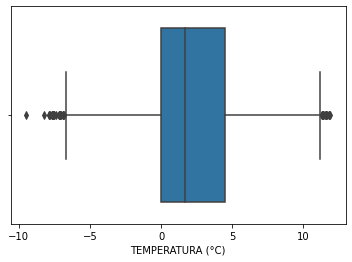

In [ ]:
sns.boxplot(x='TEMPERATURA (°C)', data=df)

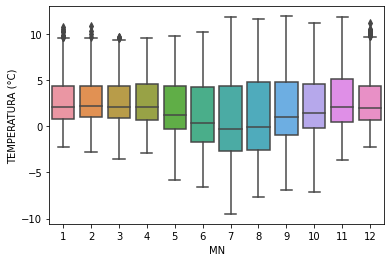

In [ ]:
sns.boxplot(x='MN', y='TEMPERATURA (°C)', data=df2)

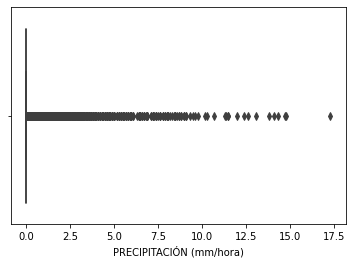

In [ ]:
sns.boxplot(x='PRECIPITACIÓN (mm/hora)', data=df)

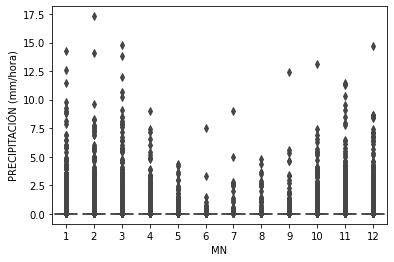

In [ ]:
sns.boxplot(x='MN', y='PRECIPITACIÓN (mm/hora)', data=df2)

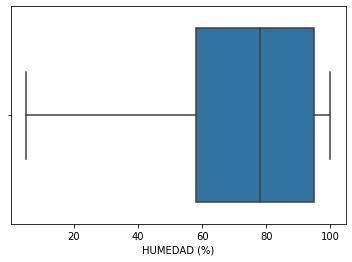

In [ ]:
sns.boxplot(x='HUMEDAD (%)', data=df)

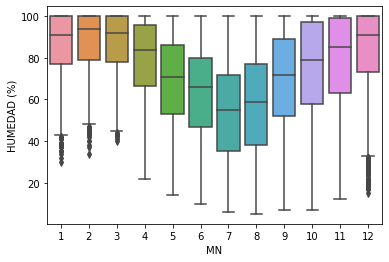

In [ ]:
sns.boxplot(x='MN', y='HUMEDAD (%)', data=df2)

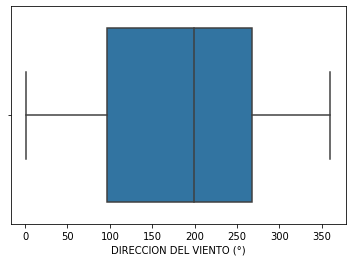

In [ ]:
sns.boxplot(x='DIRECCION DEL VIENTO (°)', data=df)

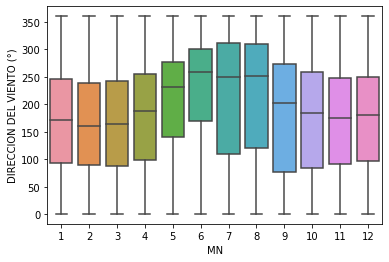

In [ ]:
sns.boxplot(x='MN', y='DIRECCION DEL VIENTO (°)', data=df2)

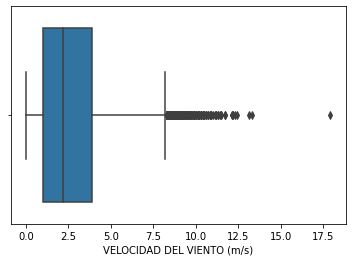

In [ ]:
sns.boxplot(x='VELOCIDAD DEL VIENTO (m/s)', data=df)

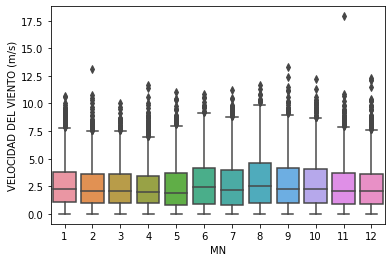

In [ ]:
sns.boxplot(x='MN', y='VELOCIDAD DEL VIENTO (m/s)', data=df2)

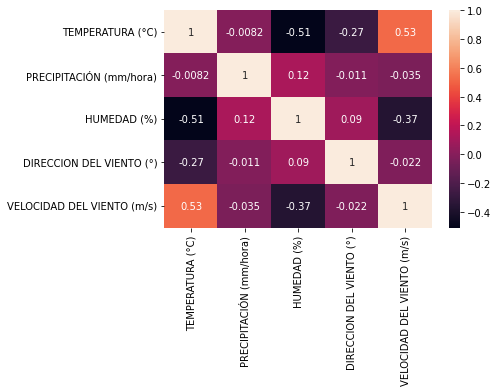

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
import sklearn.preprocessing as preprocesing
encoder=preprocesing.OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.fit(df[['Fecha']].values)

OneHotEncoder(handle_unknown='ignore')